# Project 2 - Arctic ice maps

## Introduction

The purpose of this project is to become familiar with working on image data, plotting it, and combining it in various ways for analysis. 

The data used in this problem set was/is collected by two different satellite missions. Involved are the AMSR-E instrument on the [Aqua](http://en.wikipedia.org/wiki/Aqua_%28satellite%29) satellite (data from 2002 to 2011) and the AMSR2 instrument on the [GCOM-W](https://suzaku.eorc.jaxa.jp/GCOM_W/) satellite (data from 2013 to-date). The data consist of maps of the concentration of ice in the Arctic collected between 2002 and 2022 with the exception of 2012. All the data were already downloaded and transformed for you to an easy-to-use format from [here](https://seaice.uni-bremen.de/start/data-archive/). One of the main issues to work on scientific data with Python is to first read them from various formats into `numpy`-arrays. We will come back to it in class but you do not need to worry about it here.

The data you should use are in the directory `/home/share/Project_2/ice_data` within our online-system. This is actually a (small) subset of the complete satellite data set, with only two ice maps every month (some are missing though). You should explore yourself the original data if you are interested to work with the full data set. I am very happy to help you with that! Although we only work with a small subset of available ice-maps, we would like to ask you *not* to copy them to your private space within our system but to work with them at their current location. We would like to avoid multiplying 400MB more than 100 times! If you would like to use the data on your own computer, there is a `tar`-archive at `/home/share/Project_2/ice_data_2023.tgz`.

The data is in `numpy` format, which means that you can read it as a `numpy`-array using:

    >>> import numpy as np
    >>> data = np.load('/home/share/Project_2/ice_data/20080415.npy')

which will give you a 2-d array. Just for information, this was created with:

    >>> np.save('ice_data/20080415.npy', data)
    
where `data` was a 2-d `numpy`-array that was extracted from the original data set.

**Note:** There is an ice-map for each first and each 15th of a month from the years 2003-2011 and 2013-2022 (a small amount of data is missing). For instance, the file `20080415.npy` represents data for the 15th of April 2008.

## Task 1 - getting familiar with the data and examining a single map 

**Please put the solution of this and the other tasks at the end of this notebook! You will submit the modified notebook to eCampus.**

Start off by reading in some  map as shown above, and plot it with Matplotlib (look up the `plt.imshow`-function). Note that to get the correct orientation, you will need to call the ``imshow`` command with the ``origin='lower'`` option, which ensures that the (0,0) pixels is on the bottom left, not the top left. You can try and use different colormaps if you like (set by the ``cmap`` option) - see [here](https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html) (scroll down on the page) for information on the available colormaps. You can specify a colormap to use with e.g. ``cmap=plt.cm.jet`` (i.e. ``cmap=plt.cm.`` followed by the name of the colormap). Note that you can make figures larger by specifying e.g.

    >>> plt.figure(figsize=(8,8))

where the size is given in inches. Try and find a way to plot a colorbar on the side, to show what color corresponds to what value. Remember that you can always look at the [Matplotlib Gallery](http://matplotlib.org/gallery.html) to find example plots for each `matplotlib`-feature. You can also try and remove the tick labels (``100``, ``200``, etc.) since they are not useful - but don't worry if you can't figure out how.

**Remarks:** (1) When you explore the data-values, you will notice that they contain numbers from 0 to 100. A value of 50 means that 50% of the area occupied by the corresponding pixel are covered with ice. A value of zero means that the complete pixel is covered with water; (2) Besides the numbers, a good deal of the pixels contains the special value `nan` (not a number). These are areas covered by land. Functions like `imshow` automatically ignore these values and do not produce an error. If you intend to do numerical calculations (`numpy`) with pixels that have a `nan`-value, the result is `nan` again by default. To ignore `nan`-values for building sums etc., you would need to use functions as `np.nansum` instead of `np.sum` etc.

I show below the result I obtain for this step (one winter and one summer map).
<img src="figs/ice_winter_summer.png" style="height: 300px;">

## Task 2 - reading in and examining multiple maps 

We now want to make a plot of the ice concentration over time. Reading in a single map is easy, but since we have more than 350 maps, we do not want to read them all in individually by hand. Write a loop over all the available files, and inside the loop, read in the data to a variable (e.g. ``data``), and also extract the year, month, and day as integer values (e.g. ``year``, ``month``, and ``day``) from the filename. Then, also inside the loop, construct an array ``times`` which is essentially the fractional time in years. You can assume for simplicity that each month has 30 days and each year has 360 days - this will not affect the results later. As an example, in the year 2003, you would put the 1st of January as $2003.00$, the 2nd of January as $2003 + \frac{1}{360}\approx 2003.033$ and the 1st of February as $2003 + \frac{1}{12}\approx 2003.083$ into the `times`-array. Finally, also compute for each file the total number of pixels that have a value above 50% ice. Put also those values into an array. After the loop, make a plot of the number of pixels with a concentration above 50% against time.

**Hint:** To loop over files, you can use the`glob`-module. An example is shown in the following code cell: 

We now want something a little more quantitative than just the number of pixels, so we will try and compute the area where the ice concentration is above a given threshold. However, we first need to know the area of the pixels in the image, and since we are looking at a projection of a spherical surface, each pixel will be a different area. The areas (in km$^{2}$) are contained inside the file named ``ice_data_area.npy`` (within the `/home/share/Project_2` directory). Read in the areas and make a plot (with colorbar) to see how the pixel area is changing over the image.

Now, loop over the files again as before, but this time, for each file, compute the total area where the concentration of ice is 99% or above. Make a new plot showing the area of >99% ice concentration against time. Also plot the *total area* covered by ice as a function of time.

Describe what you see - how does the minimum value within each year change over time?

## Task 3 - visualizing changes over time; does the amount of ice decrease?

In the following we always work with the *total area* covered by ice from the previous task. 

Find the date at which the area of the region covered with ice is the smallest. What is the value of the minimum area?

**Hint:** Have a look at the `np.argmin` function.

Next, read in the map for this minimum, and the map for the same day and month but from 2003. Make a side-by-side plot showing the two ice-concentrations.

Compute the difference between the two maps so that a loss in ice over time will correspond to a negative value, and a gain in ice will correspond to a positive value. Make a plot of the difference, and use the ``RdBu`` colormap to highlight the changes (include a colorbar).

**Hint:** To make a plot with different sub-figures, check out the `plt.subplot` function.

Finally, plot the `mean` ice concentrations of the years 2004-2006 over the months January to December and compare it to the mean over the years 2019-2021. What was the loss of the ice over the past 15 years at the minimum values?

**Hint:** I showed you in the lecture how to easily do this when converting corresponding data to 2d `numpy`-arrays.

## Epilogue

The data that we have here cover the past twenty years and it is worth noting that the minimum ice coverage you found here was a record minimum - never before (in recorded history) had the size of the ice shelf been so small. This is part of a long term trend due to global warming. Many scientists believe that by ~2050, the Arctic will be completely ice-free for at least part of the summer.

The lowest value of the area is:  2995844 
 and the date is: 15.09.2020
The loss of the ice over the past 15 years is:  [1308364.4251926]


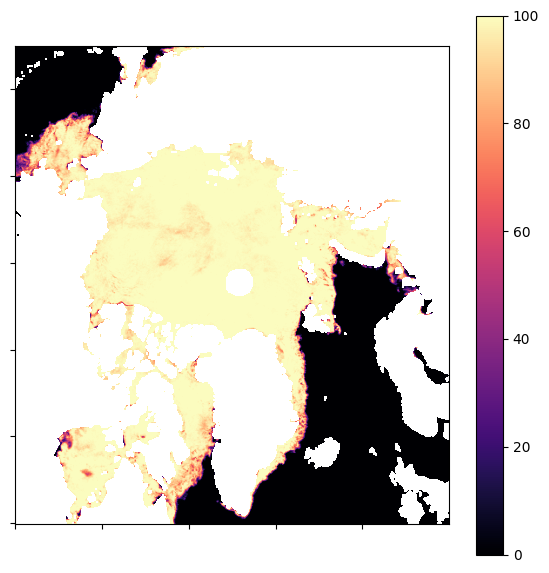

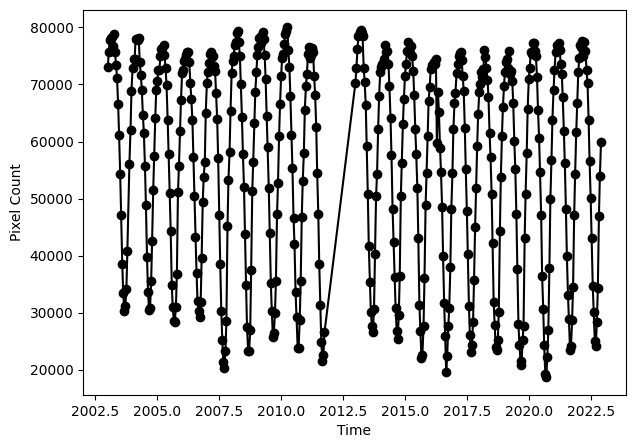

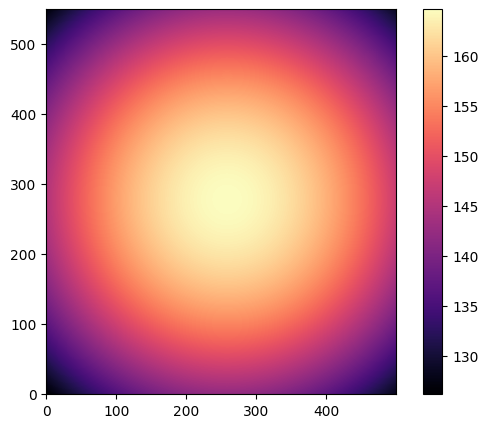

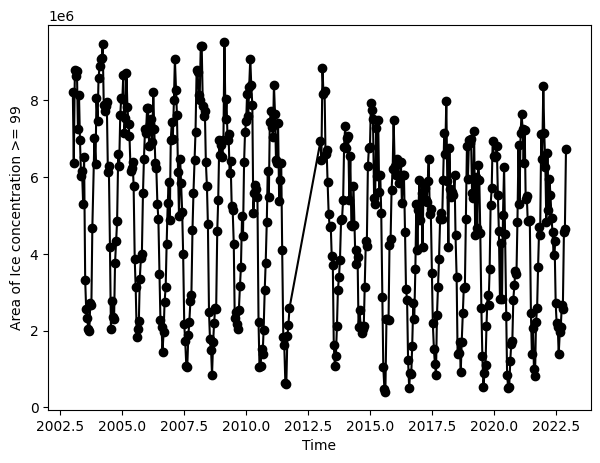

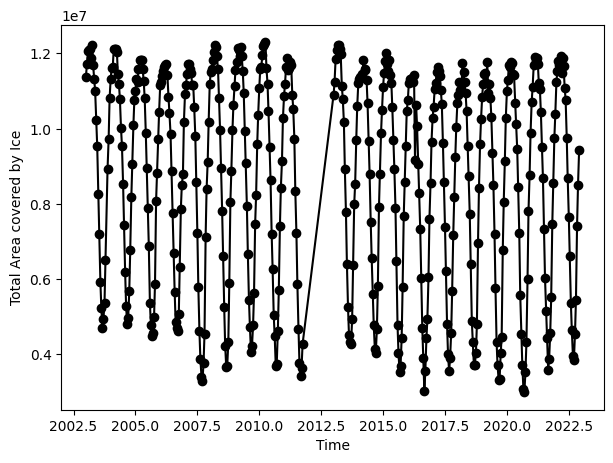

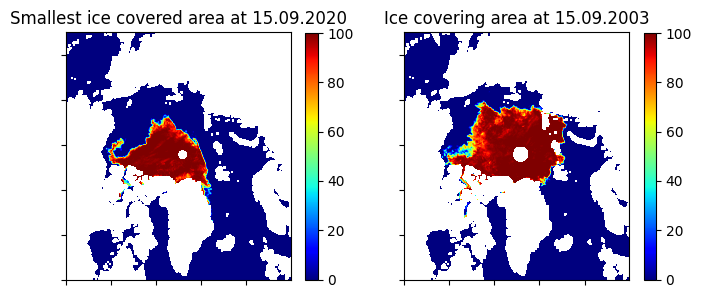

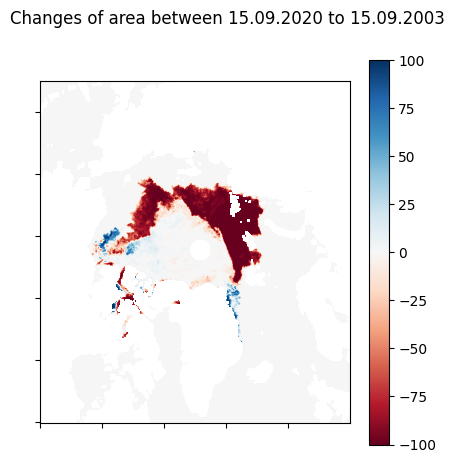

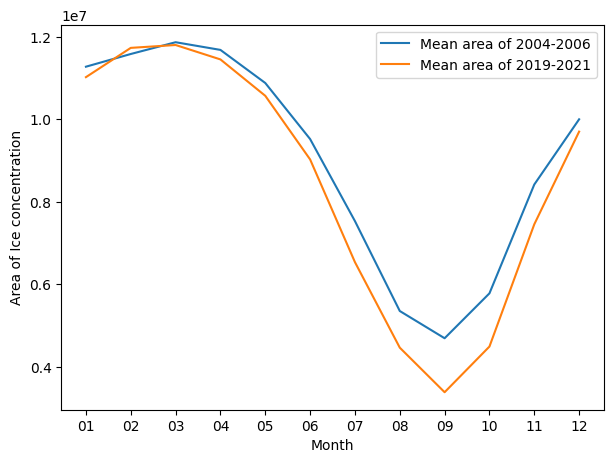

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glob


############################## task - 1 ##########################
data = np.load('/home/share/Project_2/ice_data/20080415.npy')

fig, ax = plt.subplots(figsize=(7,7))

im = ax.imshow(data, cmap='magma' , origin = 'lower')
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
fig.colorbar(im,ax=ax)


############################## task - 2 ##########################

datapath = "/home/share/Project_2/ice_data"
data_area = np.load('/home/share/Project_2/ice_data_area.npy')
filelist = glob.glob(f"{datapath}/2*")

# sort the name of the files to plot the linegraph
filelist = sorted(filelist, reverse=False)

#create the date variable
def f_date(x):
    year = int(x[0:4])
    month = int(x[4:6])
    day = int(x[6:])
    date = year + ((((month - 1) * 30) + day - 1) / 360)
    return date

#range
short_data = len(filelist) - 1
#short_data = 20


# two empty array for append the value from the following loop
arr_time = np.empty((0,1), int)
arr_pixel_count = np.empty((0,1), int)
arr_area_99 = np.empty((0,1), int)
arr_total_area = np.empty((0,1), int)

#blank list to append the date value as string which we work on later part(comparison)
list_of_date = []

for i in range(short_data):
    
    data_single_day = np.load(filelist[i])
    
    #extarct the date
    date_str = filelist[i][-12:-4]
    #append the dates as string for the comparison of 2004-2006 to 2019-2021
    list_of_date.append(date_str) 
    #construc fractional time using a function 
    time = f_date(date_str)
    
    #count the pixel of ice concentration > 50%
    pixel_count = np.nansum(np.load(filelist[i]) > 50)
    
    #mask the values which concentration of ice is 99% or above
    mask_99 = np.load(filelist[i]) >= 99
    #use the mask on data_area array and sum the masked value
    area_of_99 = np.nansum(data_area[mask_99])
    
    #mask the values which concentration of ice is 99% or above
    mask_total_area = np.load(filelist[i]) > 0
    #calculate the total area using the mask
    area_total = np.nansum(data_area[mask_total_area] * (data_single_day[mask_total_area] * .01))
    
    #append time
    arr_time = np.append(arr_time, np.array([[time]]), axis=0)
    #append pixel
    arr_pixel_count = np.append(arr_pixel_count, np.array([[pixel_count]]), axis=0)
    #append area that is grater than 99%
    arr_area_99 = np.append(arr_area_99, np.array([[area_of_99]]), axis=0)
    #append total area
    arr_total_area = np.append(arr_total_area, np.array([[area_total]]), axis=0)
        
    

#plot time vs total number of pixels that have a value above 50%
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(arr_time, arr_pixel_count, marker = "o", color = "black")    
ax.set_xlabel("Time")
ax.set_ylabel("Pixel Count")

#how the pixel area is changing over the image
fig, ax = plt.subplots(figsize=(7,5))
im_area = ax.imshow(data_area, cmap='magma' , origin = 'lower')
fig.colorbar(im_area,ax=ax)


#time vs total area where the concentration of ice is 99% or above.
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(arr_time, arr_area_99, marker = "o", color = "black")    
ax.set_xlabel("Time")
ax.set_ylabel("Area of Ice concentration >= 99")

#time vs total area covered by ice
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(arr_time, arr_total_area, marker = "o", color = "black")    
ax.set_xlabel("Time")
ax.set_ylabel("Total Area covered by Ice")



################################## task 3 #############################

#minimum area

#index of the mnimun area date
ind_minimum_area = int(np.argmin(arr_total_area, axis=0))
date_of_minimum_area = filelist[ind_minimum_area][-12:-4]
print("The lowest value of the area is: ",int(arr_total_area[ind_minimum_area]), 
      f"\n and the date is: {date_of_minimum_area[6:]}.{date_of_minimum_area[4:6]}.{date_of_minimum_area[:4]}")

#create the same date for the year 2003
date_of_2003 = filelist[ind_minimum_area][-12:-4]
date_of_2003 = date_of_2003.replace(date_of_2003[:4], "2003")

#data for the left figure
data_minimum_area = np.load(filelist[ind_minimum_area])

#data for the right figure
data_area_2003 = np.load(f"{datapath}/{date_of_2003}.npy")

#data for the difference figure
difference_minimum_2003 = data_minimum_area - data_area_2003


#----------------------------- Ice mapping figures -------------------------------
# left figure - figure of the lowest ice covering area
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,8))
im_min_left = ax1.imshow(data_minimum_area, cmap=plt.cm.jet , origin = 'lower')
ax1.xaxis.set_tick_params(labelbottom=False)
ax1.yaxis.set_tick_params(labelleft=False)
fig.colorbar(im_min_left,ax=ax1,shrink = 0.4)
ax1.set_title(f"Smallest ice covered area at {date_of_minimum_area[6:]}.{date_of_minimum_area[4:6]}.{date_of_minimum_area[:4]}")

# right figure - figure of the ice covering area of 2003
im_min_right = ax2.imshow(data_area_2003, cmap=plt.cm.jet , origin = 'lower')
ax2.xaxis.set_tick_params(labelbottom=False)
ax2.yaxis.set_tick_params(labelleft=False)
fig.colorbar(im_min_right,ax=ax2, shrink = 0.4)
ax2.set_title(f"Ice covering area at {date_of_2003[6:]}.{date_of_2003[4:6]}.{date_of_2003[:4]}")

# difference between the area of minimum and 2003
fig, ax3 = plt.subplots(figsize=(5,5))
im_area = ax3.imshow(difference_minimum_2003, cmap='RdBu' , origin = 'lower')
ax3.xaxis.set_tick_params(labelbottom=False)
ax3.yaxis.set_tick_params(labelleft=False)
fig.colorbar(im_area,ax=ax3)
plt.suptitle(f"Changes of area between {date_of_minimum_area[6:]}.{date_of_minimum_area[4:6]}.{date_of_minimum_area[:4]} to {date_of_2003[6:]}.{date_of_2003[4:6]}.{date_of_2003[:4]}")



#-------- Comparison between the mean ice concentrations of 2004-2006 with 2019-2021

#list of months
month_list = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
#list of years
year = ["2004","2005","2006","20019","2020","2021"]

#blank list to append the mean value
mean_area_of_2004_to_2006 = []
mean_area_of_2019_to_2021 = []  

#extract the area of ice concentration between 2004 to 2006
for j in range(12):
    count_1 = 0
    area_of_months = 0
    for i in range(len(list_of_date) - 1):
        x = list_of_date[i]
        if x[4:6] == month_list[j] and (x[0:4] == year[0] or x[0:4] == year[1] or x[0:4] == year[2]):  
            #count_1 for the calculation of mean
            count_1 += 1
            #sum of all areas between 2004-2006 for the calculation of mean
            area_of_months += arr_total_area[i]
            #calculate the mean
            mean_area_of_months = area_of_months / count_1   
    #append the mean value of the ice concentration area between 2004-2006
    mean_area_of_2004_to_2006.append(mean_area_of_months)


#extract the area of ice concentration between 2019 to 2021
for j in range(12):
    count_1 = 0
    area_of_months = 0
    for i in range(len(list_of_date) - 1):
        x = list_of_date[i]
        if x[4:6] == month_list[j] and (x[0:4] == year[3] or x[0:4] == year[4] or x[0:4] == year[5]):  
            #count_1 for the calculation of mean
            count_1 += 1
            #sum of all areas between 2019-2021 for the calculation of mean
            area_of_months += arr_total_area[i]
            #calculate the mean
            mean_area_of_months = area_of_months / count_1
    #append the mean value of the ice concentration area between 2019-2021
    mean_area_of_2019_to_2021.append(mean_area_of_months)

#plot the curve of comparison of Ice concentration area between 2004 - 2006 to 2019 - 2021
fig, ax = plt.subplots(figsize=(7,5))
#area of ice concentration of 2004 - 2006
ax.plot(month_list,mean_area_of_2004_to_2006, label="Mean area of 2004-2006")
#area of ice concentration of 2019 - 2021
ax.plot(month_list,mean_area_of_2019_to_2021, label = "Mean area of 2019-2021")
ax.legend(loc='upper right')
ax.set_xlabel('Month')
ax.set_ylabel('Area of Ice concentration')

#ax.plot(x, y, linewidth=2.0, label='y(x)')


print("The loss of the ice over the past 15 years is: ", (min(mean_area_of_2004_to_2006) - min(mean_area_of_2019_to_2021)))

